# 第6章：機械学習
***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score

***
## 50. データの入手・整形
>News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．
1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
>
>学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [2]:
data_dir = '../../data/'
news_dir = 'NewsAggregatorDataset/'
data_file = 'newsCorpora.csv'

In [3]:
with open(data_dir + news_dir + data_file, 'r') as f:
    df = pd.read_csv(f, sep='\t', names=[" ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY" ,"HOSTNAME", "TIMESTAMP"])

In [4]:
# 確認
df.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [5]:
# 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
#カテゴリ名と記事見出しのタブ区切り形式とせよ
# isin bool
extracted_df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

In [6]:
# 確認
extracted_df.head(3)

,TITLE,CATEGORY
12,Europe reaches crunch point on banking union,b
13,ECB FOCUS-Stronger euro drowns out ECB's messa...,b
19,"Euro Anxieties Wane as Bunds Top Treasuries, S...",b


In [7]:
# 抽出された事例をランダムに並び替える．
# 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割
train, valid_test = train_test_split(extracted_df, train_size=0.8, shuffle=True, random_state=0)
valid, test = train_test_split(valid_test, train_size=0.5, shuffle=True, random_state=0)

b    4481
e    4240
t    1214
m     737
Name: CATEGORY, dtype: int64


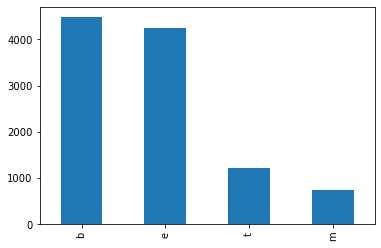

In [8]:
# 学習データと評価データを作成したら，各カテゴリの事例数を確認
# train
train_c = train["CATEGORY"].value_counts()
print(train_c)
train_c.plot.bar()

b    575
e    528
t    137
m     94
Name: CATEGORY, dtype: int64


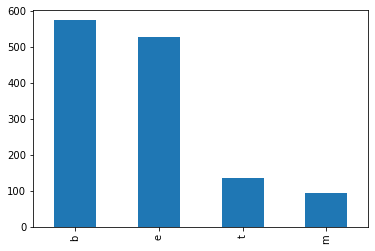

In [9]:
# valid
valid_c = valid["CATEGORY"].value_counts()
print(valid_c)
valid_c.plot.bar()

b    571
e    511
t    173
m     79
Name: CATEGORY, dtype: int64


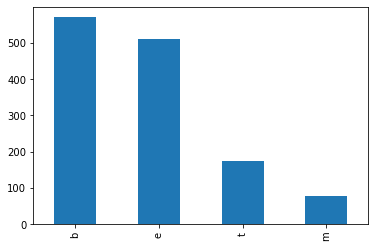

In [10]:
# test
test_c = test["CATEGORY"].value_counts()
print(test_c)
test_c.plot.bar()

In [11]:
# 保存
# それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．
#ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）
train.to_csv(data_dir + 'train.txt', sep='\t', index=None)
valid.to_csv(data_dir + 'valid.txt', sep='\t', index=None)
test.to_csv(data_dir + 'test.txt', sep='\t', index=None)

***
## 51. 特徴量抽出
> 学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [12]:
# from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts.
# カウントするだけ

count_vectorizer = CountVectorizer(stop_words='english') # If ‘english’, a built-in stop word list for English is used.
X_train = count_vectorizer.fit_transform(train['TITLE']) # Learn the vocabulary dictionary and return document-term matrix.
X_valid = count_vectorizer.transform(valid['TITLE']) # Transform documents to document-term matrix.
X_test = count_vectorizer.transform(test['TITLE'])

# dataframe に変換
X_train = pd.DataFrame(data=X_train.toarray(), columns=count_vectorizer.get_feature_names())
X_valid = pd.DataFrame(data=X_valid.toarray(), columns=count_vectorizer.get_feature_names())
X_test = pd.DataFrame(data=X_test.toarray(), columns=count_vectorizer.get_feature_names())

In [13]:
# 確認
X_test

,00,05,07,08,09,0ff,0ut,10,100,1000,...,zombie,zombies,zone,zooey,zoosk,zpfa3mqti7qdrpfhqwjm,zuckerberg,zynga,zâ,œpiece
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 保存
X_train.to_csv(data_dir + 'train.feature.txt', sep='\t', index=False)
X_valid.to_csv(data_dir + 'valid.feature.txt', sep='\t', index=False)
X_test.to_csv(data_dir + 'test.feature.txt', sep='\t', index=False)

***
## 52. 学習
> 51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [15]:
# from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0) # max_iter=100. 収束しなければ増やすとか
model.fit(X_train, train['CATEGORY']) # Fit the model according to the given training data. 重みを学習

LogisticRegression(random_state=0)

***
## 53. 予測
> 52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [16]:
def pred_score(model, x):
    pred = model.predict(x) # Predict class labels for samples in X.
    score = np.max(model.predict_proba(x), axis=1) # predict_proba 全クラスの確率がかえる
    return pred, score

In [17]:
train_pred, train_score = pred_score(model, X_train)
val_pred, val_score = pred_score(model, X_valid)
test_pred, test_score = pred_score(model, X_test)

print(train_pred, train_score)
print(val_pred, val_score)
print(test_pred, test_score)

['b' 'e' 'e' ... 'b' 'b' 'e'] [0.92737308 0.91372331 0.9526849  ... 0.99286358 0.77923085 0.9900451 ]
['t' 'e' 'b' ... 'b' 'b' 'b'] [0.61299306 0.90902257 0.74126667 ... 0.94426117 0.9967007  0.99983324]
['b' 'e' 'e' ... 'b' 'b' 'e'] [0.95831134 0.94722613 0.65939923 ... 0.98006961 0.97046601 0.91531312]


***
## 54. 正解率の計測
> 52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [18]:
# from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

print('正解率（学習データ）： {}'.format(format(train_accuracy, '.3f')))
print('正解率（評価データ）： {}'.format(format(test_accuracy, '.3f')))

正解率（学習データ）： 0.996
正解率（評価データ）： 0.914


***
## 55. 混同行列の作成
> 52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
train_cm =pd.DataFrame(confusion_matrix(train['CATEGORY'], train_pred, labels=['b', 'e', 't', 'm']), index=['b', 'e', 't', 'm'], columns=['b', 'e', 't', 'm'])
test_cm = pd.DataFrame(confusion_matrix(test['CATEGORY'], test_pred, labels=['b', 'e', 't', 'm']), index=['b', 'e', 't', 'm'], columns=['b', 'e', 't', 'm'])

print('<< train >>')
print(train_cm)
print('\n<< test >>')
print(test_cm)

<< train >>
      b     e     t    m
b  4467     4     9    1
e     6  4234     0    0
t    15     4  1195    0
m     2     3     0  732

<< test >>
     b    e    t   m
b  538   18   14   1
e    7  500    3   1
t   33   18  121   1
m    5   13    1  60


In [21]:
import seaborn as sns

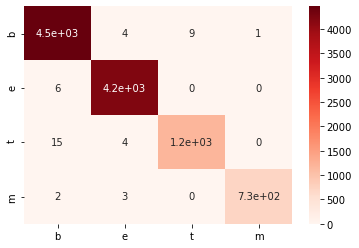

In [22]:
# TRAIN
sns.heatmap(train_cm, annot=True, cmap='Reds')

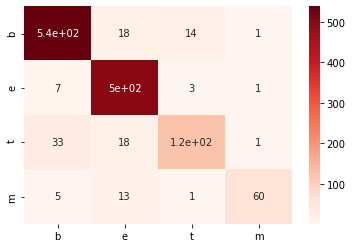

In [23]:
# TEST
sns.heatmap(test_cm, annot=True, cmap='Reds')

***
## 56. 適合率，再現率，F1スコアの計測
> 52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [ ]:
# TP: 機械学習モデルP, 実際P。実際のクラスが陽性で予測も陽性（正解）
# FP: 機械学習モデルP, 実際N。実際のクラスは陰性で予測が陽性（不正解）
# FN: 機械学習モデルN, 実際P。実際のクラスは陽性で予測が陰性（不正解）
# TN: 機械学習モデルN, 実際N。実際のクラスが陰性で予測も陰性（正解）

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [25]:
# 適合率
# TP / (TP + FP)
# Positiveと分類されたデータの中で実際にPositiveだったデータの割合
precision = precision_score(test['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
precision = np.append(precision, precision_score(test['CATEGORY'], test_pred, average='micro'))
precision = np.append(precision, precision_score(test['CATEGORY'], test_pred, average='macro'))

# 再現率
#TP / (TP + FN)
# 取りこぼしなくPositiveをPositiveと推測できているかどうか
recall = recall_score(test['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
recall = np.append(recall, recall_score(test['CATEGORY'], test_pred, average='micro'))
recall = np.append(recall, recall_score(test['CATEGORY'], test_pred, average='macro'))

# F1スコア
# 2*TP / (2*TP + FP + FN)
# 適合率と再現率の調和平均
f1 = f1_score(test['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
f1 = np.append(f1, f1_score(test['CATEGORY'], test_pred, average='micro'))
f1 = np.append(f1, f1_score(test['CATEGORY'], test_pred, average='macro'))

scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1}, index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])

In [26]:
scores

,適合率,再現率,F1スコア
b,0.922813,0.942207,0.932409
e,0.910747,0.978474,0.943396
t,0.870504,0.699422,0.775641
m,0.952381,0.759494,0.845070
マイクロ平均,0.913793,0.913793,0.913793
マクロ平均,0.914111,0.844899,0.874129


***
## 57. 特徴量の重みの確認
> 52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [31]:
#features = X_train.columns.values
features = np.array(count_vectorizer.get_feature_names())

for c, coef in zip(model.classes_, model.coef_):
    print('\nカテゴリ：', c)
    best10 = features[np.argsort(coef)[::-1][:10]]
    worst10 = features[np.argsort(coef)[:10]]
    print('重みの高いトップ10：', best10)
    print('重みの低いトップ10：', worst10)


カテゴリ： b
重みの高いトップ10： ['bank' 'ecb' 'fed' 'china' 'stocks' 'ukraine' 'yellen' 'argentina'
 'dollar' 'mcdonald']
重みの低いトップ10： ['activision' 'aereo' 'ebola' 'virus' 'heartbleed' 'star' 'video' 'cap'
 'pump' 'heart']

カテゴリ： e
重みの高いトップ10： ['kardashian' 'chris' 'paul' 'movie' 'miley' 'trailer' 'film' 'cyrus'
 'star' 'jay']
重みの低いトップ10： ['google' 'facebook' 'china' 'gm' 'microsoft' 'study' 'apple' 'billion'
 'oil' 'scientists']

カテゴリ： m
重みの高いトップ10： ['ebola' 'fda' 'cancer' 'mers' 'study' 'drug' 'brain' 'cigarettes' 'cases'
 'alzheimer']
重みの低いトップ10： ['dimon' 'facebook' 'gm' 'climate' 'apple' 'google' 'twitter' 'sales'
 'takes' 'estimates']

カテゴリ： t
重みの高いトップ10： ['facebook' 'google' 'microsoft' 'apple' 'climate' 'activision'
 'heartbleed' 'tesla' 'moon' 'fcc']
重みの低いトップ10： ['stocks' 'percent' 'valued' 'grows' 'raise' 'fed' 'day' 'american'
 'cancer' 'cut']


***
## 58. 正則化パラメータの変更
> ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [32]:
from tqdm import tqdm # 進捗状況や処理状況をプログレスバー（ステータスバー）として表示する機能

In [34]:
c = np.logspace(-5, 4, 10, base=10)

result = []
for C in tqdm(c):
    lg = LogisticRegression(C=C, random_state=0)#, max_iter=10000)
    lg.fit(X_train, train['CATEGORY'])
    
    # 予測値
    train_pred = lg.predict(X_train)
    valid_pred = lg.predict(X_valid)
    test_pred = lg.predict(X_test)
    
    # 正解率
    train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
    valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
    test_accuracy = accuracy_score(test['CATEGORY'], test_pred)
    
    result.append([C, train_accuracy, valid_accuracy, test_accuracy])

100%|██████████| 10/10 [29:14<00:00, 175.49s/it]


In [36]:
import matplotlib.pyplot as plt

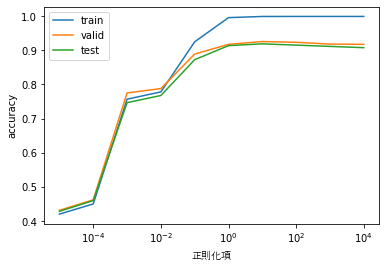

In [43]:
# グラフ
result = np.array(result)
plt.plot(result[:, 0], result[:, 1], label='train')
plt.plot(result[:, 0], result[:, 2], label='valid')
plt.plot(result[:, 0], result[:, 3], label='test')

plt.xscale('log')

plt.ylabel('accuracy')
plt.xlabel('正則化項', fontname='AppleGothic')

plt.legend()
plt.show()

***
## 59. ハイパーパラメータの探索
> 学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [49]:
def search_param(C, solver):
    C = C_lst[int(np.round(C))] # np.round 四捨五入
    solver = solver_lst[int(np.round(solver))] 
    model = LogisticRegression(random_state=0, C=C, solver=solver)
    model.fit(X_train, train['CATEGORY'])
    val_pred = model.predict(X_valid)
    val_accuracy = accuracy_score(valid['CATEGORY'], val_pred)
    return val_accuracy

In [45]:
from bayes_opt import BayesianOptimization

In [52]:
C_lst = np.logspace(-1, 1, 10, base=10)
solver_lst = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] # 最適解の探索手法

# 最適化するパラメータの上限、下限
bounds = {
    'C': (-0.5, 9.49),
    'solver': (-0.5, 4.5)
}
## ベイズ最適化
opt = BayesianOptimization(search_param, bounds) # 関数と最適化するパラメータを渡す
opt.maximize() # 最適化

|   iter    |  target   |     C     |  solver   |
-------------------------------------------------


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


|  1        |  0.9108   |  6.702    |  2.511    |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


|  2        |  0.9063   |  3.47     |  2.681    |
|  3        |  0.8988   |  1.192    |  0.9428   |
|  4        |  0.9235   |  7.282    |  0.2818   |
|  5        |  0.919    |  4.884    |  0.1694   |
|  6        |  0.925    |  9.49     | -0.5      |
|  7        |  0.9258   |  9.49     |  1.46     |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


|  8        |  0.8966   |  9.49     |  4.5      |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


|  9        |  0.8793   | -0.5      |  4.5      |
|  10       |  0.9258   |  8.847    |  0.5431   |
|  11       |  0.9243   |  7.815    | -0.5      |
|  12       |  0.9258   |  9.49     |  0.583    |
|  13       |  0.9235   |  6.182    | -0.5      |
|  14       |  0.9258   |  8.788    |  1.285    |
|  15       |  0.9258   |  9.236    |  1.031    |
|  16       |  0.9198   |  3.627    | -0.5      |
|  17       |  0.9243   |  8.244    |  0.8459   |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|  18       |  0.925    |  9.025    |  1.978    |
|  19       |  0.925    |  8.894    | -0.2023   |
|  20       |  0.925    |  9.49     |  0.06939  |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|  21       |  0.925    |  9.101    |  1.545    |
|  22       |  0.8763   | -0.4669   | -0.4205   |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


|  23       |  0.8943   |  4.896    |  4.5      |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|  24       |  0.925    |  9.49     |  2.447    |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|  25       |  0.9243   |  8.169    |  1.889    |
|  26       |  0.9235   |  6.864    | -0.4887   |
|  27       |  0.919    |  4.922    | -0.5      |
|  28       |  0.9205   |  6.264    |  0.632    |
|  29       |  0.9168   |  3.299    |  0.7115   |


/Users/kawasakiharuka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


|  30       |  0.925    |  9.479    |  1.818    |


In [53]:
## 最適化したハイパーパラメータで評価
optimized_params = opt.max['params']
C = C_lst[int(np.round(optimized_params['C']))]
solver = solver_lst[int(np.round(optimized_params['solver']))]

model = LogisticRegression(random_state=0, C=C, solver=solver)
model.fit(X_train, train['CATEGORY'])
pred = model.predict(X_test)
score = accuracy_score(test['CATEGORY'], pred)
print('Optimized C: ', C)
print('Optimized solver: ', solver)
print('Best test accuracy: ', score)

Optimized C:  10.0
Optimized solver:  newton-cg
Best test accuracy:  0.9190404797601199
